<h1>Questions to be handed in for project 3:</h1>

<p>Read about this here: <a href="http://mth229.github.io/graphing.html">Graphing Functions with Julia</a>.</p>

<p>For the impatient, <code>Julia</code> has several packages that allow for graphical presentations, but nothing "built-in."  We will use the <code>Plots</code> package, a front-end to several graphing packages. As a backend we have to choose one, and will use <code>plotly</code>. (We assume this is the default, if not, enter the command <code>plotly&#40;&#41;</code> to select it.)</p>

<p>The <code>Plots</code> package is loaded when the <code>MTH229</code> package is:</p>

In [1]:
# load MTH229 package one way or the other
using Pkg
if haskey(Pkg.installed(), "MTH229")
    using MTH229
else
    try
        Pkg.add(PackageSpec(url="https://github.com/mth229/MTH229.jl", rev="master"))
        using MTH229
    catch err
        include(download("https://raw.githubusercontent.com/mth229/MTH229.jl/master/src/229.jl"))
    end
end

<p>The Plots package brings in a <code>plot</code> function that makes plotting functions as easy as specifying a function object and the $x$ domain to plot over:</p>

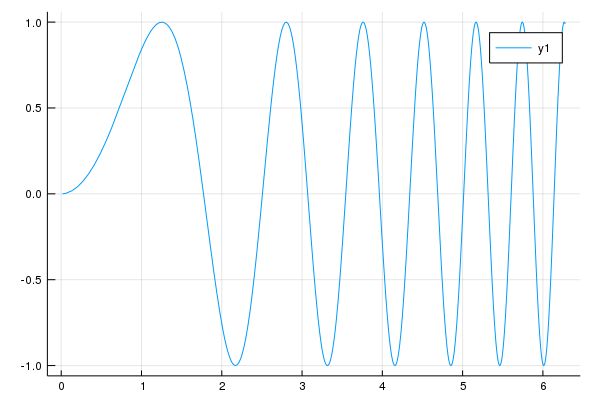

In [1]:
f(x) = sin(x^2)
plot(f, 0, 2pi)

<p>Often most of the battle is <em>judiciously</em> choosing the values of $a$ and $b$ so that the graph highlights a feature of interest. Such as a relative maximum or minimum, a zero, a vertical asymptote, a horizontal asymptote, a slant asymptote...</p>

<p>The use of a function as an argument is not something done with a calculator, but is very useful when using <code>Julia</code> for calculus as many actions may be viewed as operating on the function $f$, not the values of the function, $f(x)$.</p>

<hr />

<p>More than one function can be plotted on a graph. The <code>plot&#33;</code> function makes this easy: make the first plot with <code>plot</code> and any additional ones with <code>plot&#33;</code>. For example:</p>

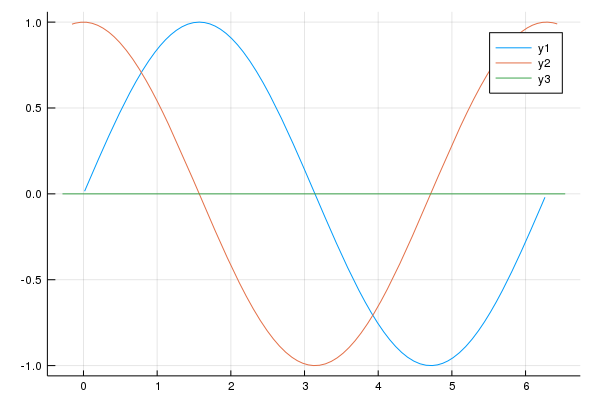

In [1]:
plot(sin, 0, 2pi)
plot!(cos)                   # or plot!(cos, a, b) to specify new domain to plot over
plot!(zero)

<hr />

<p>A plot is nothing more than a connect-the-dot graph of paired $x$ and $y$ values. It can be useful to know how to do the steps. The above graph of <code>sin</code> could be done with:</p>

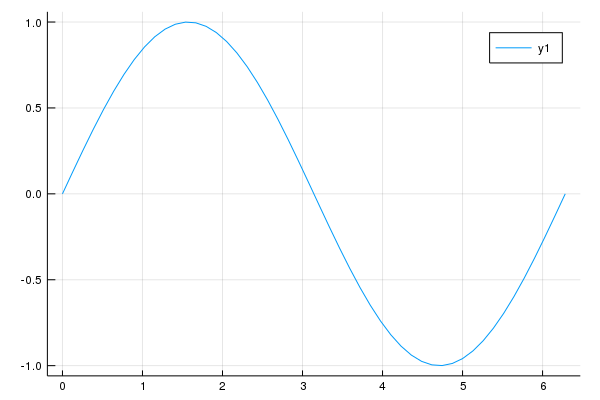

In [1]:
a, b = 0, 2pi
xs = range(a, stop=b, length=50)  		# 50 points between a and b
ys = map(sin, xs)	        # or ys = [sin(x) for x in xs] or sin.(xs) (see the notes)
plot(xs, ys)

<p>The <code>xs</code> and <code>ys</code> are written as though they are "plural" because these variables contain 50 values each in a container (a vector in this case). The <code>map</code> command "maps" a function to each value in the container and returns a new container with the "mapped" values. In the example above, these are the values for the <code>sin</code> at each <code>x</code>. The "dot" notation (for <code>broadcast</code>) compactly does the same thing–-just use a "dot", as in <code>f.&#40;xs&#41;</code> instead of <code>f&#40;xs&#41;</code>.</p>

<p>Containers (vectors in this case) are often constructed by combining like values within square brackets separated by commas: e.g., <code>&#91;a,b&#93;</code>. For plotting, we can combine functions using <code>&#91;&#93;</code> and all will plot, as an alternative to using <code>plot&#33;</code>:</p>

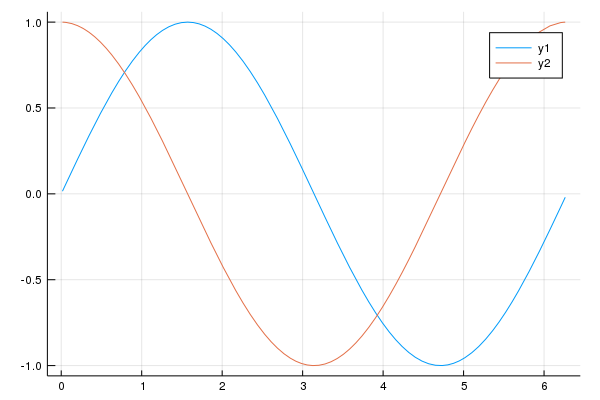

In [1]:
plot([sin, cos], 0, 2pi)

<p>Finally, <code>scatter&#33;</code> can be used to add points to a graph. These are specified as vectors of <code>x</code> and <code>y</code> values.</p>

<hr />

<h3>Questions</h3>

<ul>
<li><p>Make a plot of $f(x) = \exp(x) - x^3$ over the interval  $[3,5]$. From your graph, estimate the value where the graph crosses the $x$ axis.</p>
</li>
</ul>

<p>The commands to produce the plot are:</p>

<p>The approximate zero is:</p>

<ul>
<li><p>For the same function $f(x) = \exp(x) - x^3$ make graphs over different domains until you can find another zero. What is this other approximate zero?</p>
</li>
</ul>

<ul>
<li><p>Graph the polynomial function $f(x) = 2x^3 - 5x^2 + x$. By graphing different domains, approximate the location of the three roots to one decimal point. (For polynomials, roots are the same as zeros, a value $x$ with $f(x)=0$.)</p>
</li>
</ul>

<p>The smallest root is:</p>

<p>The middle root is:</p>

<p>The largest root is:</p>

<ul>
<li><p>A cell phone plan has 700 minutes of talking for 20 dollars with each additional minute over 700 minutes costing 10 cents per minute.</p>
</li>
</ul>

<p>Which function models this plan?</p>

&#10054; `f(x) = x < 700 ? 20.0  : 0.10*(x-700)`
&#10054; `f(x) = x < 700 ? 20.0  : 20.0 + 0.10*(x-700)`
&#10054; `f(x) = x < 700 ? 20.0  : 20.0 + 0.10*x`



<p>Graph the correct function between $0$ and $1,000$. Use your graph to estimate the cost for $800$ minutes of usage.</p>

<p>The cost for $800$ minutes is:</p>

<hr />

<p>These next three questions require you to constantly replot a function until you have framed the function as desired. You may have to do this <em>several</em> times.</p>

<ul>
<li><p>The function $f(x) = (2x - x^2) \cdot e^x$ increases on just one interval. What is it? (Use interval notation $(a,b)$.)</p>
</li>
</ul>

<ul>
<li><p>The function $f(x) = (\sin(x)^2 - 2x + 1)^5$ is very flat between $-1$ and $2$. By repeatedly graphing on smaller intervals, find an interval of the type $[x, x + 0.01]$ which contains a zero. (E.g., $[0.68, 0.69]$.)</p>
</li>
</ul>

<ul>
<li><p>The function $f(x) = \sin(120\pi x)$ is a highly oscillatory function. Using trial-and-error, or some other means, find a value $b$ so that the plot over $[-b,b]$ shows exactly one period.</p>
</li>
</ul>

<h2>Asymptotes</h2>

<p>Function with asymptotes (vertical, horizontal, or slant) can pose challenges, as the the wrong choice of domain to plot over can mean the plotting of points on a vertical asymptote can overwhelm other values. Judiciously choosing the values to plot over is important. For example, plotting the following function over $[0,2]$ will show the vertical asymptote (spuriously plotted), but not whether there is a slant or horizontal asymptote. For that, try plotting over $[-10,10]$.</p>

<ul>
<li><p>Graph the rational function $f(x) = (x^2 + 1)/ (x - 1)$. Do you see any asymptotes (horizontal, slant, vertical)? If so, describe them.</p>
</li>
</ul>

<p>Does this function have any <em>vertical</em> asymptotes? Enter how many? ($0,1,\dots$)</p>

<p>Does this function have a <em>horizontal</em> asymptote?</p>

&#10054; Yes
&#10054; No



<p>Does this function have a <em>slant</em> asymptote?</p>

&#10054; Yes
&#10054; No



<ul>
<li><p>Make a graph of the rational function $f(x) = (x^2 - 2x + 1)/(x^2 - 4)$. Use a suitable domain so that <em>any</em> vertical asymptotes can be seen. What interval is appropriate for this task:</p>
</li>
</ul>

&#10054; $(0, \pi)$
&#10054; $(0, 2\pi)$
&#10054; $(-5, 5)$



<ul>
<li><p>Make a graph of the rational function $f(x) = (x^2 - 2x + 1)/(x^2 - 4)$. Use a suitable domain so that <em>any</em> horizontal asymptotes can be seen. What interval is appropriate for this task:</p>
</li>
</ul>

&#10054; $(-10, 10)$
&#10054; $(0, 1)$
&#10054; $(-1, 1)$



<ul>
<li><p>Make a plot of $f(x) = \tan(x)$ over $(-\pi/2, \pi/2)$. From your graph, what $x$ value corresponds to a $y$ value of $1.1$? (Plotting with <code>a&#61;-pi/2, b&#61;pi/2</code> will give an unpleasant graph. Try backing off a bit from each side.)</p>
</li>
</ul>

<hr />

<ul>
<li><p>Plot <em>both</em> $f(x) = \cos(x)$ and $g(x) = x/2$ over the interval $[0, \pi/2]$. Using the graph, find out when $f(x) = g(x)$.</p>
</li>
</ul>

<p>The two functions have the same value at $x=$:</p>

<ul>
<li><p>To solve when $f(x) = g(x)$ we can either plot <em>both</em> functions and look for intersection points, or plot the difference of the two function $h(x) = f(x) - g(x)$. For $f(x) = e^x$ and $g(x) = x^4$, plot the function $h(x) = f(x) - g(x)$ over the interval $[0,3]$ to find a solution. Graphically estimate the value:</p>
</li>
</ul>

<ul>
<li><p>The following commands produce the graph of $f(x) = x^2$ over the interval $[0,2]$, a <em>secant</em> line connecting the points $(0,f(0))$ and $(2,f(2))$, and <em>three</em> tangent lines at $x=1/2$, $x=1$ and $x=3/2$. Which tangent line is <em>parallel</em> to the secant line?</p>
</li>
</ul>

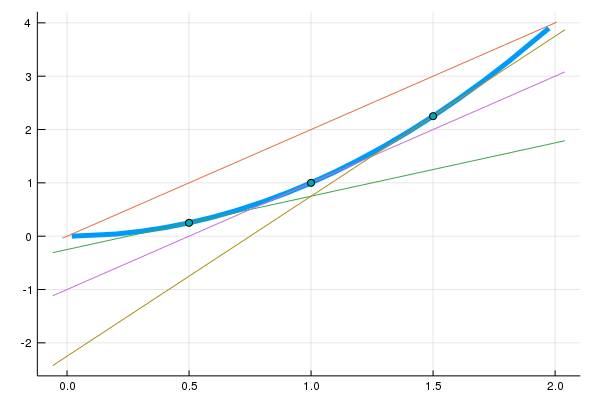

In [1]:
a,b = 0, 2
f(x) = x^2
plot(f, a, b, linewidth=5, legend=false)
plot!(secant(f, a, b))
pts = [1/2, 1, 3/2]
plot!(tangent.(f, pts))
scatter!(pts, f.(pts))

&#10054; The tangent line at $c=1/2$
&#10054; The tangent line at $c=1$
&#10054; The tangent line at $c=3/2$



<p>(The mean value theorem guarantees there will be at least one $c$ in $[0,2]$ where the tangent line is parallel to the secant line.)</p>

<h2>NaN values.</h2>

<p>The value <code>NaN</code> is a floating point value that arises during some indeterminate operations, such as <code>0/0</code>. The <code>plot</code> function will stop connecting the dots when it encounters an <code>NaN</code> value. This convention can be gainfully employed. The following uses it to graph a straight line <em>only</em> when the cosine is positive.</p>

<ul>
<li><p>Make a plot of <code>f&#40;x&#41; &#61; sin&#40;x&#41;</code> and <code>g&#40;x&#41; &#61; cos&#40;x&#41; &gt; 0 ? 0.0 : NaN</code></p>
</li>
</ul>

<p>over $[0, 2\pi]$. What is the relationship? (Notice, the graph of $g(x)$ shows only when $\cos(x)$ is positive.)</p>

&#10054; When $g(x)$ is shown, $f(x)$ is increasing
&#10054; When $g(x)$ is shown, $f(x)$ is decreasing
&#10054; When $g(x)$ is shown, $f(x)$ is positive



<ul>
<li><p>The following function can be used to restrict the range of a</p>
</li>
</ul>

<p>mathematical function:</p>

In [1]:
trim(f::Function; cutoff=10) = x -> abs(f(x)) > cutoff ? NaN : f(x)

trim (generic function with 1 method)

<p>Let $g(x) = 2\cos(x) + 3/(x-\pi)^2$. Here we see why it can be useful:</p>

<p>Plot $g(x)$ over the interval $(0,\pi)$. Can you identify the smallest $y$ value for this function over this interval?</p>

&#10054; No, it can not be identified
&#10054; Yes, it is $0.93$
&#10054; Yes it is $1.18$
&#10054; Yes, it is $1.74$



<p>Now instead of plotting <code>g</code>, plot <code>trim&#40;g&#41;</code> over the same interval. From this graph, can you identify the smallest $y$ value for this function over this interval?</p>

&#10054; No, it can not be identified
&#10054; Yes, it is $0.93$
&#10054; Yes it is $1.18$
&#10054; Yes, it is $1.74$



<h2>Mapping a function</h2>

<p>In <code>Julia</code> a collection of values can be made by combining them with square brackets, as in <code>&#91;1,1,2,3,5&#93;</code>. For reqular patterns the colon can be used: <code>1:5</code> or the <code>range</code> function, as in: <code>range&#40;0, stop&#61;pi, length&#61;100&#41;</code>. These last two create "recipes" to generate values, rather than the values themselves. Collections of values are useful for many reasons. We will see later how they are used to store the zeros of a function.</p>

<p><code>Julia</code> has a few different ways of applying a function to each value in a collection.  The <code>map</code> function, called as <code>map&#40;f, collection&#41;</code> will work, as will the "dot" notation of <code>f.&#40;collection&#41;</code>.</p>

<ul>
<li><p>If <code>as &#61; &#91;1,2,3,4,5&#93;</code> which of these command <em>does</em> not generate the collection of each value cubed, assuming $f(x) = x^3$?</p>
</li>
</ul>

&#10054; `map(f, as)`
&#10054; `f.(as)`
&#10054; `f(as)`



<ul>
<li><p>The  command <code>as &#61; linspace&#40;0, pi, 10&#41;</code> will create 10 evenly spaced numbers starting at 0 and ending at $\pi$. Apply the function $f(x) = sin(x^2)$ to each value. How many of the resulting values are <em>negative</em>?</p>
</li>
</ul>